# **Blueberry Yield Prediction**

In this project, I wrote a program that predicts the yield of blueberries, after being trained with the train_data set. Different features of blueberries are analyzed to see their relation with the yield and how they effect the prediction results. 

For this I used some different regression models to see which ones would give more accurate results. To see the accuracy of the models I used the mean_absolute_error function from sklearn_metrics. 

**Importing necessary libraries and reading train.csv**

I started by importing the necesarry libraries. Then I created the berry_data, reading the train.csv. The decribe function lets me see that there are 0 values but no empty value spaces that could create some issues for the code.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#the libraries i used for this program

# assigns the csv path
berry_data_path = r'/kaggle/input/math482-2024-2025-1-hw-01/train.csv'

# reads the train.csv given
berry_data = pd.read_csv(berry_data_path)                             

# gives a description of values of features
print(berry_data.describe())                                         

# shows the values of the top 5 rows, gives an insight
print(berry_data.head())                                               


                 id          Row#     clonesize      honeybee       bumbles  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean    7499.500000    431.614067     19.932709      0.385999      0.285451   
std     4330.271354    217.540936      8.945950      0.286250      0.059446   
min        0.000000      0.000000     12.500000      0.000000      0.000000   
25%     3749.750000    256.000000     12.500000      0.250000      0.250000   
50%     7499.500000    472.000000     25.000000      0.500000      0.250000   
75%    11249.250000    599.000000     25.000000      0.500000      0.380000   
max    14999.000000   5983.000000    750.633803     18.430000      0.585000   

            andrena         osmia  MaxOfUpperTRange  MinOfUpperTRange  \
count  15000.000000  15000.000000      15000.000000      15000.000000   
mean       0.487741      0.591901         82.337333         49.773460   
std        0.147636      0.145647          9.164759          5.556526

# Data Visualization (Exploratory Data Analysis)

Then I wanted to see the histograms of each feature and wrote the following using matplotlib. It helped me analyze how each feature might affect the yield values by visualizing their density distributions.

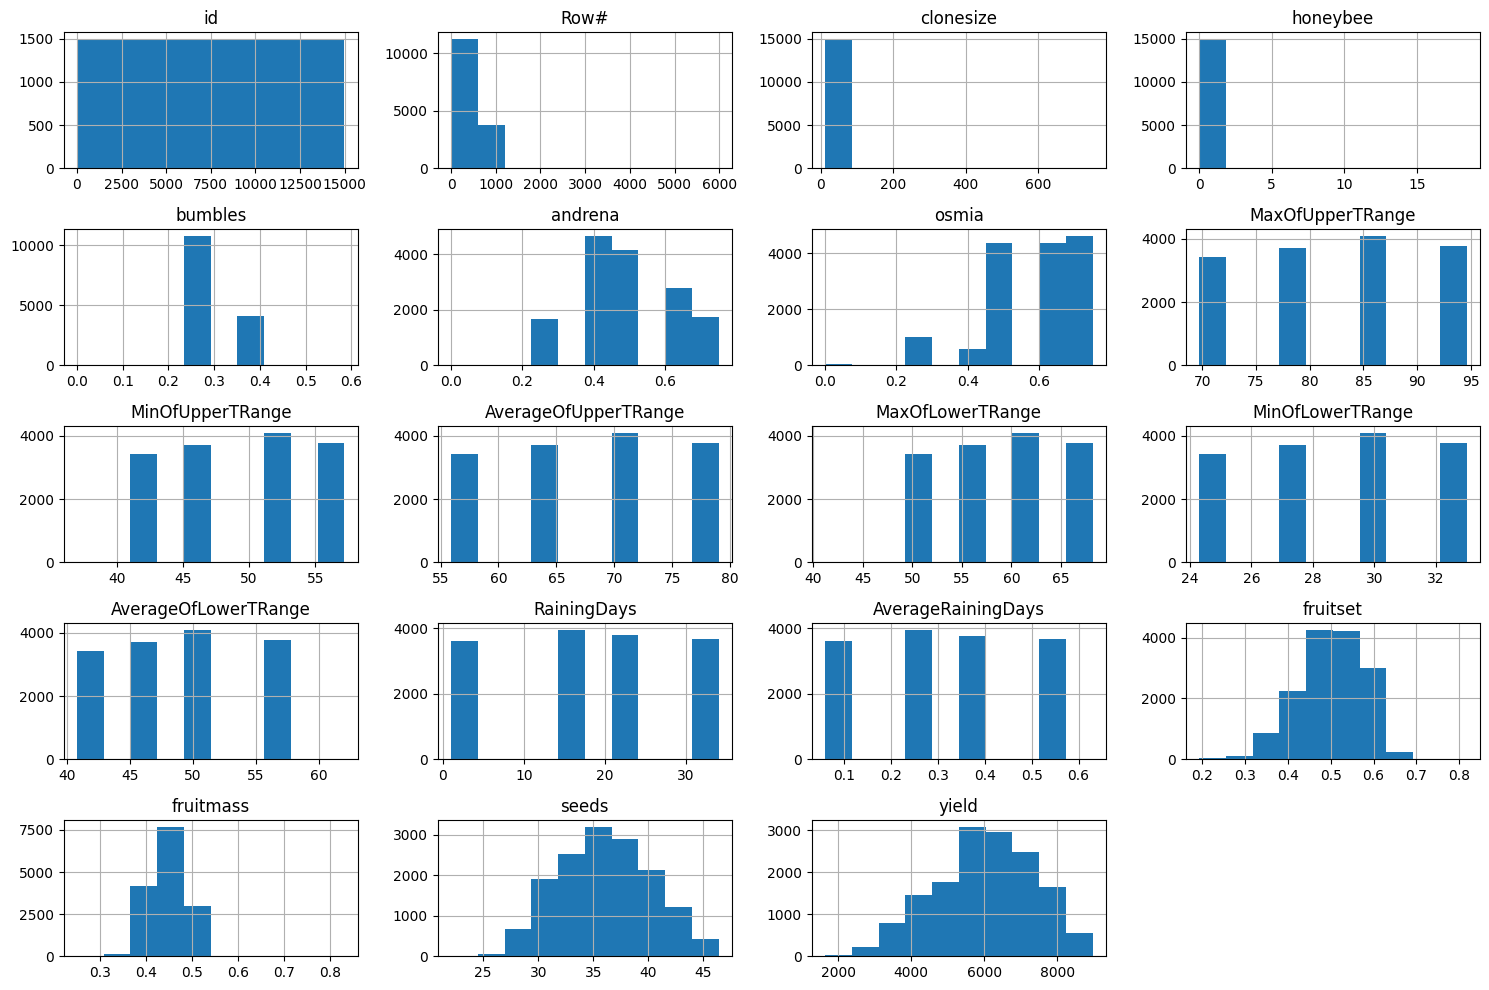

In [2]:
berry_data.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

I thought finding the outliers in the data and cleaning some of them might help with my regression's accuracy (feature engineering). But after doing some trial and error I found out that the cleaning process decreases the accuracy and increases the mean absolute error. Under this passage you can see the method I used to get the outliers but I'll leave them in ''' so running all in the notebook won't negatively affect the end result.

In [3]:
'''from scipy.stats import zscore

# Calculate Z-scores for each feature
z_scores = berry_data.apply(zscore)

# Check for values with Z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)
outliers_sum = outliers.sum()
print(outliers_sum)

# Correlation matrix
correlation_matrix = berry_data.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Remove outliers based on a threshold for each feature
threshold = 3  # Z-score threshold
outliers = (z_scores > threshold) | (z_scores < -threshold)
berry_data_cleaned = berry_data[~outliers.any(axis=1)]  # Remove rows with any outliers
'''

"from scipy.stats import zscore\n\n# Calculate Z-scores for each feature\nz_scores = berry_data.apply(zscore)\n\n# Check for values with Z-scores greater than 3 or less than -3\noutliers = (z_scores > 3) | (z_scores < -3)\noutliers_sum = outliers.sum()\nprint(outliers_sum)\n\n# Correlation matrix\ncorrelation_matrix = berry_data.corr()\n\n# Visualize the correlation matrix using a heatmap\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')\nplt.show()\n\n# Remove outliers based on a threshold for each feature\nthreshold = 3  # Z-score threshold\noutliers = (z_scores > threshold) | (z_scores < -threshold)\nberry_data_cleaned = berry_data[~outliers.any(axis=1)]  # Remove rows with any outliers\n"

Then, to increase the data visualization value and understand the data further, I wrote the following to see the relation between a selected feature (which in honeybee for this case) and the yield (that we want to predict). I also added a 3d scatter plot to see if there is a concentration area that could help my understanding.

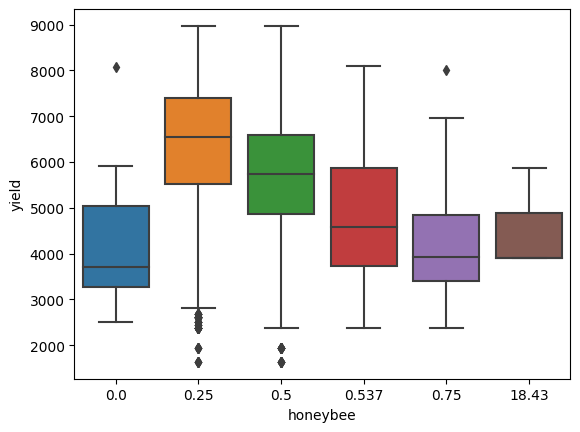

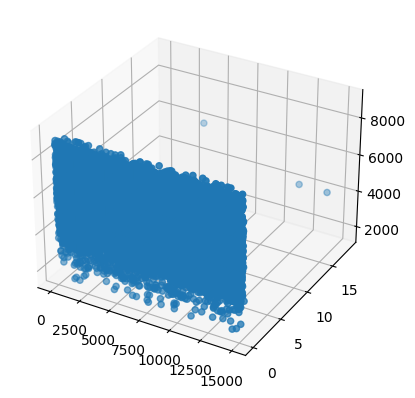

In [4]:
sns.boxplot(x='honeybee', y='yield', data=berry_data)
plt.show()

ax = plt.axes(projection='3d'); ax.scatter(berry_data['id'], berry_data['honeybee'],berry_data['yield'])
plt.show()

# Analyzing the Data and Using Regression Models (Solution Approach and Results Interpretations)

After the visualizations, I started with analyzing the data using .columns. The y value indicates the yield feature and the other features are put into the X variable. The first regression model I used is decision tree regressor which I have imported from sklearn.tree. Decision tree was my first choice due to it being easy to interpret and working well with nonlinear relationships. 
After fitting the model, adding the mean_absolute_error from the sklearn.metrics and training the model using the splitting method with the test data, I made it calculate the mean absolute error of the model's predictions. I saw that it was far from optimal and looked for ways to optimize the model, tuning the max leaf nodes parameters according to my data. 

In [5]:
berry_data.columns
y = berry_data['yield']

berry_features = ['clonesize','honeybee','bumbles','andrena','osmia','MaxOfUpperTRange','MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange','RainingDays','AverageRainingDays','fruitset','fruitmass','seeds']
X = berry_data[berry_features]   # creates varibale X as all berry features

from sklearn.tree import DecisionTreeRegressor
berry_model = DecisionTreeRegressor(random_state=1)
berry_model.fit(X,y)             #gets the decision tree regressor to fit our data


from sklearn.metrics import mean_absolute_error
predicted_berry_yield = berry_model.predict(X)
mean_absolute_error(y, predicted_berry_yield)

from sklearn.model_selection import train_test_split

# splits the data to train the model with the train varibles and test with the val variables
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=0)  
berry_model = DecisionTreeRegressor()
berry_model.fit(train_X,train_y)
val_predictions = berry_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

360.60732259466664


I defined a get_mae function to test different max_leaf_nodes values in the decision tree regressor model, each time the loop give another max leaf nodes value it returns the mean absolute error for that value. Seeing the output I decided to go with the 75 as my best max leaf node value. The MAE did get better compared to the last one.

In [6]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [ 50,60,70,75,80,90,100,150]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    
best_max_leaf_nodes = 75      #found from the upper for loop

trial_model = DecisionTreeRegressor(max_leaf_nodes=best_max_leaf_nodes,random_state=0)        # optimized decision tree model
trial_model.fit(train_X,train_y)
predictions_Trial = trial_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions_Trial)
print(mae)

Max leaf nodes: 50  		 Mean Absolute Error:  250
Max leaf nodes: 60  		 Mean Absolute Error:  249
Max leaf nodes: 70  		 Mean Absolute Error:  250
Max leaf nodes: 75  		 Mean Absolute Error:  249
Max leaf nodes: 80  		 Mean Absolute Error:  250
Max leaf nodes: 90  		 Mean Absolute Error:  250
Max leaf nodes: 100  		 Mean Absolute Error:  250
Max leaf nodes: 150  		 Mean Absolute Error:  250
249.77387110851046


After finding the precision of the decision tree model I wanted to try some other regression models to compare. The second I tried was the Rondom Forest regressor which i imported from the sklearn.ensemble. Since the decision tree regression models tend to overfit, I thought using random forest may help with the reducing the overfitting. I took the n_estimator value as 150 and found the MAE as below. 

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Define and train the random forest model
rf_model = RandomForestRegressor(n_estimators=150, random_state=1)
rf_model.fit(train_X, train_y)

# Make predictions
rf_predictions = rf_model.predict(val_X)

# Evaluate
rf_mae = mean_absolute_error(val_y, rf_predictions)
print("Random Forest MAE:", rf_mae)


Random Forest MAE: 256.33196739327644


As the third regression model I imported the gradient boosting regressor. It gave a more accurate result, due to its nature of building an ensamble of weak learners, that work sequentially to correct errors of the each previous tree. I took the n_estimators as 100 and learning rate is 0.1. The prediction value was the best among three regression models I tried. 

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

# Define and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=1)
gb_model.fit(train_X, train_y)

# Make predictions
gb_predictions = gb_model.predict(val_X)

# Evaluate
gb_mae = mean_absolute_error(val_y, gb_predictions)
print("Gradient Boosting MAE:", gb_mae)

Gradient Boosting MAE: 243.22838469838817


I wanted to use the Stacking regressor to see if I can find a way to make these three regression models work together to form a more optimized model. But before that I also wanted to have them tuned for my data. For this reason I imported the GridSearchCV from sklearn.model_selection. Assigned different values for parameters of the decision tree regressor and put it into GridSearchCV to find which one works the best to achieve the lowest mae. 

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [3, 4, 5, 10],
    'max_leaf_nodes': [25,50,75,100,150]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(train_X, train_y)

# Best parameters from grid search
print("Best Parameters: ", grid_search.best_params_)
print("Best MAE: ", -grid_search.best_score_)


Best Parameters:  {'max_depth': 15, 'max_leaf_nodes': 75, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best MAE:  255.46126739773314


I put the best parameters in the code block I gave below, just to have a more clear look.

In [10]:

final_model = DecisionTreeRegressor(
    max_depth= 15,
    min_samples_split=2,
    min_samples_leaf=4,
    max_leaf_nodes=75,
    random_state=0
)


As my final model, I used the Stacking regressor which I imported from the sklearn.ensamble to optimize my model using different regression models together. The stacking regressor helped me with my idea of creating a model that combines multiple regressors and utilizes their strengths. I also added KNeighbors method importing the regressor from sklearn.neighbors. I created a list of estimators called base_models which includes DecisionTree, RandomForest, GradientBoosting ,and KNeighbors Regressors as each of them captures different patterns of the data.
I then defined my meta_model using linear regression function (I also tried Ridge(alpha=1.0) as my meta model but it increased the process time withoout being more accurate). Using the stacking regressor I reached my final model called stacking_model. I made it fit my training data and have it predict the yield values of the blueberries. The mean absolute error this model got was the best I could get.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression



# individual base models are defined
base_models = [
    ('rf', RandomForestRegressor(n_estimators=150, random_state=1)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=1)),
    ('dt', DecisionTreeRegressor(max_depth= 15,min_samples_split=2,min_samples_leaf=4,max_leaf_nodes=75,random_state=0)),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]


# meta-model is defined
meta_model = LinearRegression()


# Building and training the stacking ensemble
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(train_X, train_y)

# Stacking predictions
stacking_predictions = stacking_model.predict(val_X)

# mae is calculated
stacking_mae = mean_absolute_error(val_y, stacking_predictions)
print("Stacking Ensemble MAE:", stacking_mae)


Stacking Ensemble MAE: 241.6781665233461


Lastly, I added the test data to my program to create the test_X variable that I put in my model that gave me predictions on the yield. Then I created a dataframe that I converted into my submission file and finalized my project. 

In [12]:
test_data_path = r'/kaggle/input/math482-2024-2025-1-hw-01/test.csv'
test_data = pd.read_csv(test_data_path)


# test data is prepared the same way so the berry_features is used
test_X = test_data[berry_features]

# stacking model predictions on test data
test_predictions = stacking_model.predict(test_X)

# a DataFrame is created with the predictions and their indexes
predictions_df = pd.DataFrame({
    'id': range(15000, len(test_predictions) + 15000),
    'yield': test_predictions
})

# Save to CSV
predictions_df.to_csv('submission_last_cansu.csv', index=False)


# Conclusion

In this project I tried different methods of regression to find the most accurate berry yield prediction. After different tunings and trials I concluded that using decision tree, random forest tree, k neighbors and gradient boosting together in the stacking regressor gave the most accurate prediction and created my final model. Stacking allowed me to highlight the strengths of each model, with the meta-model (Linear Regression) effectively capturing relationships that each base model might miss on its own. I used the test data to get my submission file and submitted it to this competition.